## Background:
An online retail store has hired a consultant to analyze their data and provide insights to the CEO and CMO to understand the key drivers of their current success and inform strategic planning for next year's expansion.

The leadership wants to see operational and marketing metrics, identify high-performing areas, and understand performance based on demographics. The consultant needs to prepare relevant analytics and insights for a meeting next month, focusing on evaluating current performance and suggesting metrics to guide expansion decisions, keeping in mind the perspective of business leaders.

## Data Source:

Dataset: *Online Retail.xlsx* .   
Available from: Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database
Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012
(Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).
(https://archive.ics.uci.edu/ml/about.html)




In [1]:
#import all necessary libs for Data Analyse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns



In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read xlsx file
try:
  df = pd.read_excel('/content/drive/MyDrive/Forage/03 Tata/Online Retail.xlsx')
  df.head() # Display first 5 rows of the dataframe
except FileNotFoundError:
  print("Error: 'Online Retail.xlsx' not found in the current directory.")
except Exception as e:
  print(f"An error occurred: {e}")


In [4]:
#Dataframe basic information and missing values
df.describe()
df.info()
missing_values = df.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Observations:
The dataset has 541909 entries, which includes: InvoiceNo;StockCode ;Description ;Quantity;InvoiceDate;UnitPrice;CustomerID; and Country.

The missing values are in Description, and CustomerID, which we is not necessary to deal with for our current task.

In [5]:
# Add one columns, which represents the sales amount for each order, (Quantity* UnitPrice)
# Calculate the new column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Display the updated dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:

# Convert 'InvoiceDate' to datetime objects
if not pd.api.types.is_datetime64_any_dtype(df['InvoiceDate']):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, and day into separate columns
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day

# Example: Extract the day of the week (Monday=0, Sunday=6)
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Example: Create a 'Month-Year' column
df['InvoiceMonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Display the updated dataframe
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDayOfWeek,InvoiceMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,2010-12


## Task 1:
**Strategic and insight-driven questions for CEO (Chief Executive Officer) and CMO (Chief Marketing Officer).**

Create a set of four questions that you anticipate each business leader will ask and want to know the answers to. Make sure you differentiate your questions, as both the CEO and CMO view business decisions through different lenses.


CMO focus: Marketing initiatives, branding, and customer engagement.
CEO focus: Overseeing the entire business, including finance, operations, and strategy.



### Solutions:
- For the CEO:
1. Which types of customers or areas bring in the most money? Are there places we should focus on more—or less?

2. Which products make us the most profit, and are there any trends showing what people might want more of in the future?

3. How much money does a customer spend with us over time, and how does that differ by age, gender, or location?

4. Which times of the year (months or weeks) do we earn the most, and are there seasonal trends we can plan around?





- For the CMO (Marketing & Customers):
1. Which countries have the most repeat customers, and where do we need to improve loyalty?

2. What kinds of products are popular in different countries—can we personalize marketing based on that?

3. Are there certain days or times when people are more likely to shop? Can we time campaigns better?

4. Which types of customers (age, gender, location) are most loyal, and how can we attract more people like them?


### More aspects to consider:

Questions of interest to the CEO

Which region is generating the highest revenue, and which region is generating the lowest?
This question is important to the CEO as it is based on the fundamental source of income for the business, i.e., revenue. Revenue analysis is important to the CEO as top-level executives are always focused on earnings and how to increase it. Here, the CEO is interested in the viewing revenue by the regions, to assess which regions are generating the highest revenue and which regions are generating lower revenue. Using the data and
analysis, the CEO will be able to decide on how to further generate revenue in the regions that are already generating the most revenue. For the regions that are not generating enough revenue, the CEO will then study the reasons why there is a lack of sales in those regions and try to improve the products and make them more suitable for those regions.

What is the monthly trend of revenue, which months have faced the biggest increase/decrease?
A monthly trend of revenue will provide the CEO with insights on how the revenue is fluctuating each month. This will enable the CEO to analyze how the internal changes inside the company have had impact on the sales. E.g., how a new product launch has led to an increase in revenue during the month or how the introduction of a new region has led to an increase in revenue for the online store. The CEO can also analyze if there have been any delays internally that would have caused a potential decrease. Such analysis is vital for the senior management as it would enable them to plan ahead and try to make the customer experience as smooth as possible.


Which months generated the most revenue? Is there a seasonality in sales?
In retail businesses, there are always months that will have a greater demand due to seasonality. There will be cases where the data will experience regular and predictable changes that recur every calendar year. Such seasonal months would be necessary to identify as the CEO would be interested in devising a strategy that would gain the maximum benefit from the months that have greater demands.


Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?
This analysis is highly important as it would enable the CEO to identify what the main drivers are behind the total revenue. Looking at the top customers of the retail store would provide an idea of which customers are
contributing the most to the revenue. The store can then derive a strategy where the top customers can be targeted with more products that they can buy. This will ensure higher revenue for the store as these customers
are the top buyers from the store. Although having fewer customers buying in high volumes can be beneficial for a business, there can also be a drawback. Retailers would have less bargaining power with these customers because they drive the majority of the revenue for the store and can negotiate lower prices. The CEO needs to be notified of the diversification of the customers so that he can plan ahead of time. In cases wehre the business is highly dependent on a few customers, the plan would be to increase the customer base and target more customers that would bring more revenue to the store.  

Questions of interest to the CMO


What is the percentage of customers who are repeating their orders? Are they ordering the same products or different?
This question shows that the CMO is interested in viewing the trends in customer orders. He is interested to know how many customers out of the total are coming back to them and re-ordering. This analysis will help explain to the CMO what percentage of customers are buying from them more than once. Once this is identified, the CMO can come up with a strategy to target these customers with more offers and products that they would need. The analysis will also be done to see what they are buying the second time, this will provide the CMO trends into what products and sub products are in demand and then a marketing strategy can be devised to target these customers with better options.


For the repeat customers, how long does it take for them to place the next order after being delivered the previous one?
This analysis will help the CMO identify the frequency of orders. This would mean determining how long the customers are taking to re-order from the store. The expectation is that those customers who have recently made a purchase would have the product on their mind and are expected to purchase or use the product again in the future. Once the information is gathered from the analysis, the CMO can create a strategy to get the recent customers to revisit the business and spend more. For the customers who have not made purchases again from the store, efforts can be made to remind them that it has been a while since they last purchased from the store. Incentivizing customers also comes into play in this scenario.


What revenue is being generated from the customers who have ordered more than once?
Revenue stems from how much the customer spends to purchase the products from the store. Therefore, the analysis needs to be done to determine how much revenue is being generated from the customers who are regular buyers from the store. The CMO can devise a strategy to encourage customers who spend more money on repeat purchases to continue to do so. It is also important to note that if a customer has made a big purchase the first time, they should be encouraged to come and shop from the store again. A marketing strategy will ensure that the high paying customers will continue to bring more revenue to the store going forward, as well.


Who are the customers that have repeated the most? How much are they contributing to revenue?
It is also important to assess which customers are repeating the most and how much are they contributing to the revenue. There would be customers who need the same products on a weekly or monthly basis, however, the products do not have a high monetary value. Therefore, the contribution to revenue for these customers will be low. On the other hand, there might be customers who are ordering twice a year and have very big orders in terms of revenue. These customers buy on certain months only, therefore, the management needs to ensure that enough supplies are available to accommodate their orders. The customers will high order volumes and low revenue would need to be offered more discounts so that they can buy in bulk and lead to more revenue.

## Task 2:
- Choose the best type of visual (e.g., bar chart, line graph, pie chart, etc.) to clearly present that specific information.

- Use the provided resources to understand which visual works best for different types of data and business needs.

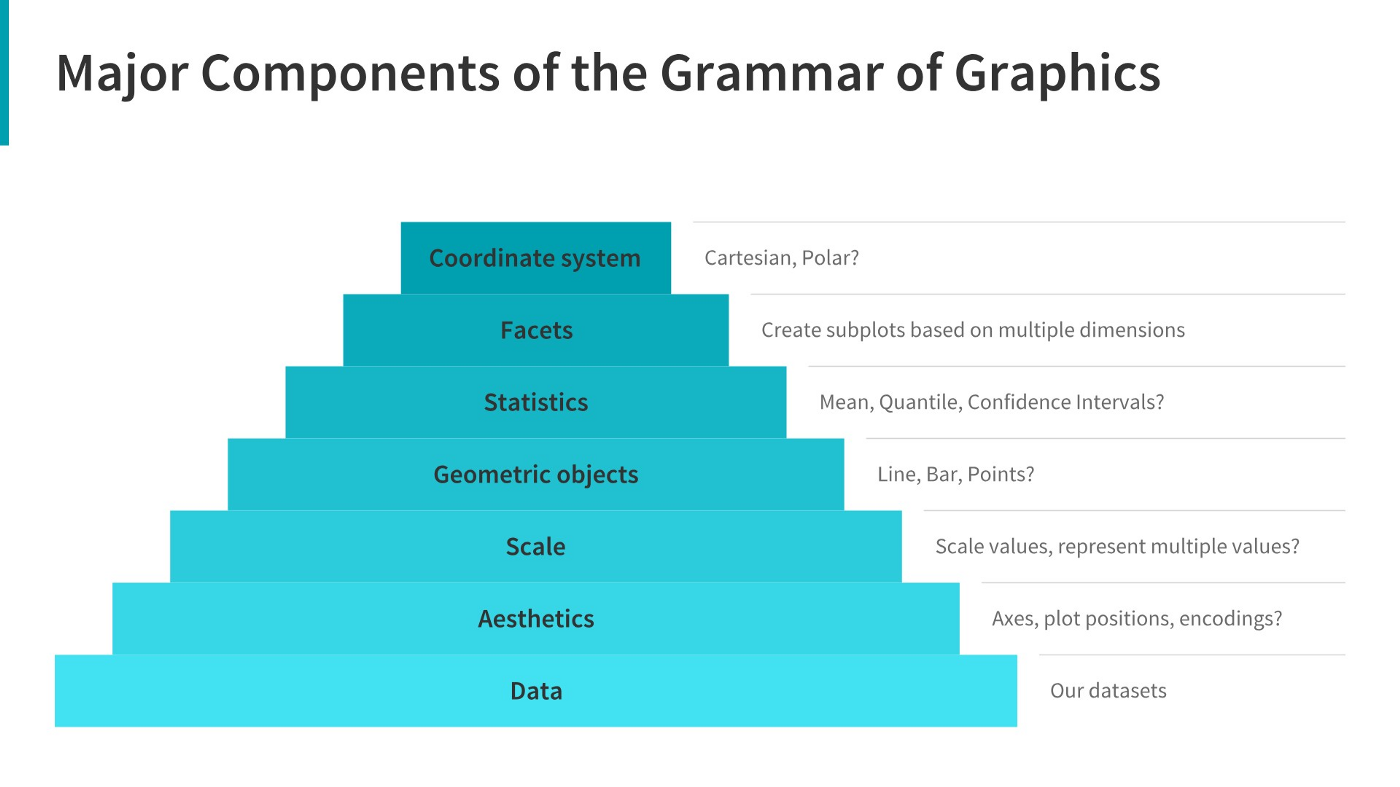

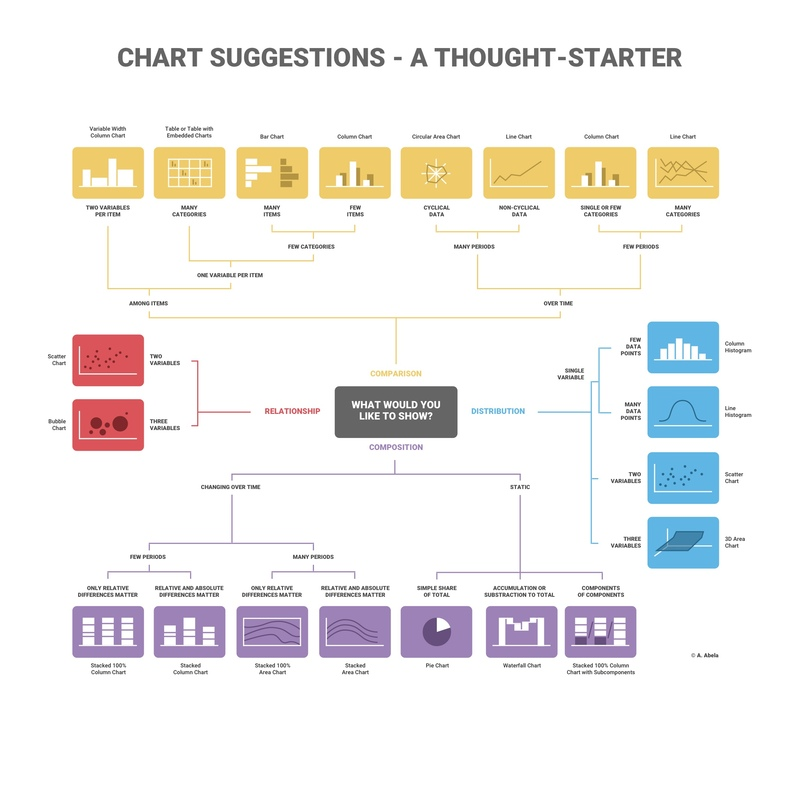

### Solutions:
Q1 - The CEO of the retail store is interested to view the time series of the revenue data for the entire year. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year. Which visual would most likely help the CEO analyse the data?
-> **Line Chart**

Q2 - The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, as a subcomponent, they would also like to see which products are contributing to the total revenue being generated by each country. Which visual would enable the CMO to view the revenue for each country and the breakdown by products on a single chart?
-> **Stacked Bar Chart**

Q3 - The CEO of the online retail store wants to see how much average revenue is generated by each country. They are interested in viewing the following metrics on the visual: Minimum value First quartile value Median value Third quartile value Maximum value Which chart would you create to show the above metrics for the average revenue generated by each country?
->  **Box Plot**

Q4 - The CMO of the online retail store wants to view the information on the top 10 customers by revenue. They are interested in a visual that shows the greatest revenue-generating customer at the start and gradually declines to the lower revenue-generating customers. The CMO wants to target the higher revenue-generating customers and ensure that they remain satisfied with their products. Which visual would help the CMO understand the data on revenue generated by the top 10 customers?
-> **Column Chart**

Q5 - The CEO is looking to gain insights on the demand for their products. They want to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, they will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. Which chart would be most useful to provide the CEO information on the demand in each region?
-> **Map Chart**

## Task 3:
The key focus is on analyzing trends and breaking down data by various categories to understand the main revenue drivers.

- Create the visuals around four of the questions that the CEO and CMO have requested.

### Data cleaning
- check that the quantity should not be below 1 unit
- check that the Unit price should not be below $0

In [7]:
# Check for Quantity values below 1
invalid_rows = df[df['Quantity'] < 1]

if not invalid_rows.empty:
    print("Rows with 'Quantity' below 1:")
    print(invalid_rows)
else:
    print("No rows found with 'Quantity' below 1.")


Rows with 'Quantity' below 1:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  \
141    2010-

In [8]:
#Check for UnitPrice values below 0
invalid_price = df[df['UnitPrice'] < 0]
if not invalid_price.empty:
    print("Rows with 'UnitPrice' below 0:")
    print(invalid_rows)
else:
    print("No rows found with 'UnitPrice' below 0.")


Rows with 'UnitPrice' below 0:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  \
141    2010

In [9]:
# Remove rows where Quantity is below 1 and UnitPrice is below 0
df = df[(df['Quantity'] >= 1) & (df['UnitPrice'] >= 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDayOfWeek,InvoiceMonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,2010-12


In [10]:
revenue_summary = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalAmount'].sum().reset_index()

# Print or further process the revenue_summary DataFrame
revenue_summary


,InvoiceYear,InvoiceMonth,TotalAmount
0,2010,12,823746.140
1,2011,1,691364.560
2,2011,2,523631.890
3,2011,3,717639.360
4,2011,4,537808.621
5,2011,5,770536.020
6,2011,6,761739.900
7,2011,7,719221.191
8,2011,8,759138.380
9,2011,9,1058590.172


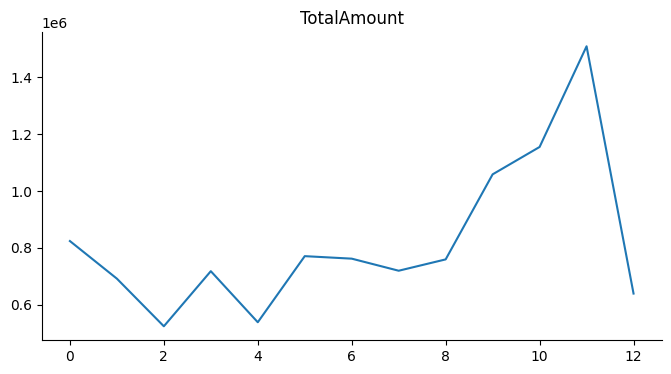

In [11]:
# @title TotalAmount

from matplotlib import pyplot as plt
revenue_summary['TotalAmount'].plot(kind='line', figsize=(8, 4), title='TotalAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

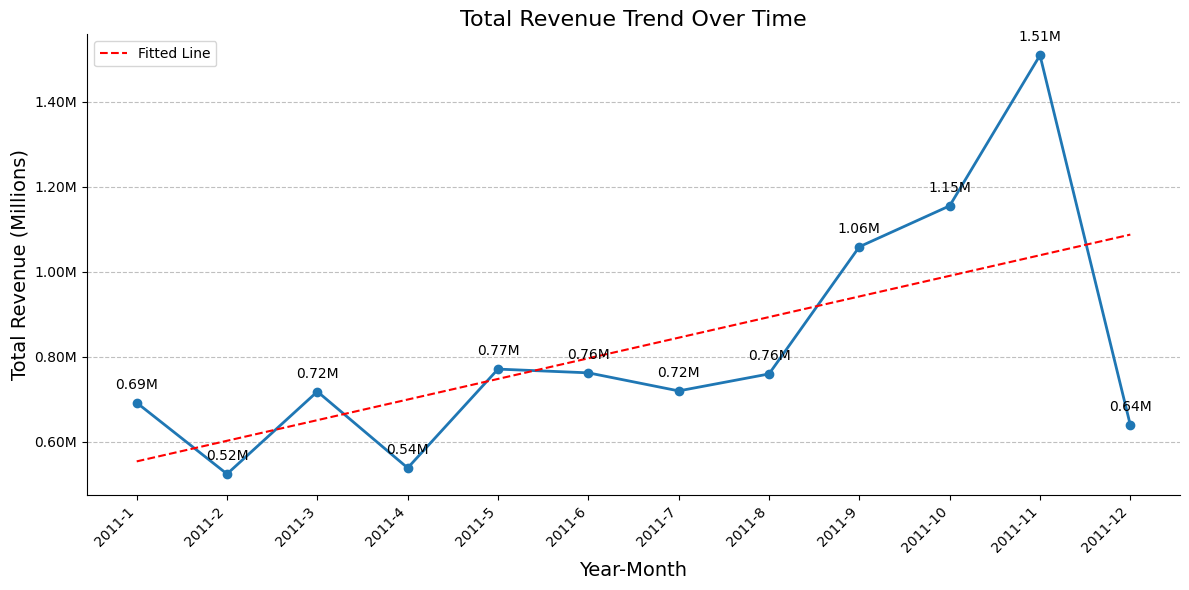

In [12]:

plt.figure(figsize=(12, 6))
#Only filter 2011 data
revenue_summary = revenue_summary[revenue_summary['InvoiceYear'] == 2011]
plt.plot(revenue_summary['InvoiceYear'].astype(str) + '-' + revenue_summary['InvoiceMonth'].astype(str), revenue_summary['TotalAmount'], marker='o', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Total Revenue Trend Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Revenue (Millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)

# Format y-axis
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Fit a line to the data
z = np.polyfit(range(len(revenue_summary['TotalAmount'])), revenue_summary['TotalAmount'], 1)
p = np.poly1d(z)
plt.plot(revenue_summary['InvoiceYear'].astype(str) + '-' + revenue_summary['InvoiceMonth'].astype(str), p(range(len(revenue_summary['TotalAmount']))), "r--", label="Fitted Line")

# Annotate each point with its value
# Reset the index of revenue_summary DataFrame before annotating
revenue_summary = revenue_summary.reset_index(drop=True)
for i, txt in enumerate(revenue_summary['TotalAmount']):
    plt.annotate(f'{txt/1000000:.2f}M', (revenue_summary['InvoiceYear'].astype(str)[i] + '-' + revenue_summary['InvoiceMonth'].astype(str)[i], txt), textcoords="offset points", xytext=(0,10), ha='center')


plt.legend()
plt.tight_layout()
plt.show()


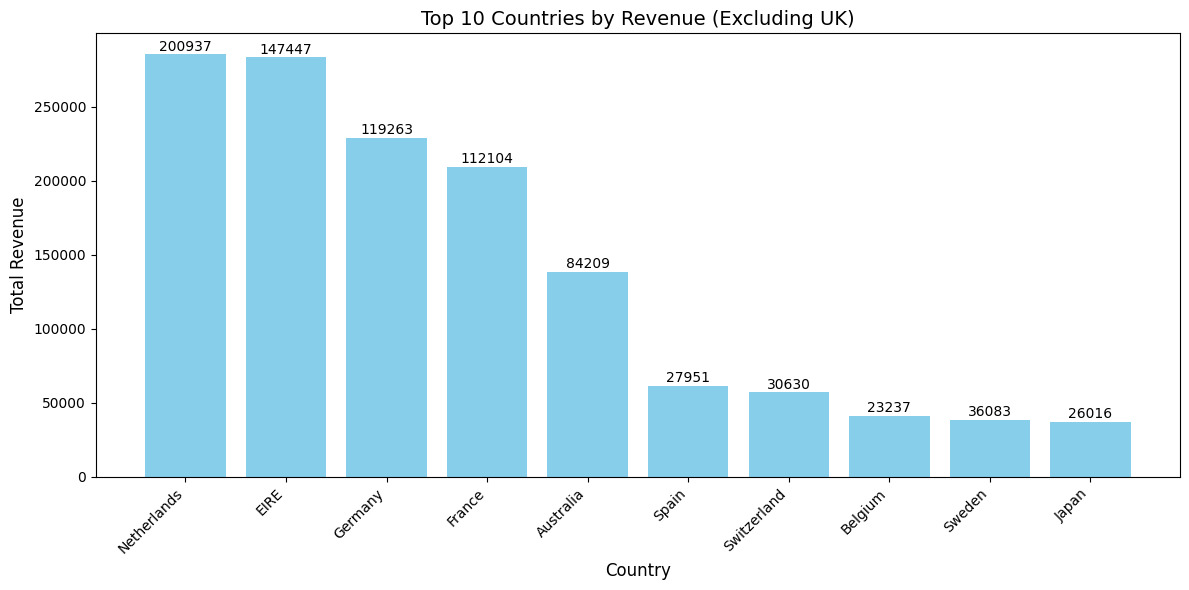

In [13]:
#
top_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalAmount'].sum().nlargest(10).reset_index()
top_countries = pd.merge(top_countries, df.groupby('Country')['Quantity'].sum().reset_index(), on='Country', how='left')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['TotalAmount'], color='skyblue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Top 10 Countries by Revenue (Excluding UK)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add quantity as text labels above each bar
for i, v in enumerate(top_countries['TotalAmount']):
    plt.text(i, v + 500, f"{top_countries['Quantity'][i]:.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [14]:
# Calculate total revenue and quantity for each country (excluding UK)
top_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')[['TotalAmount', 'Quantity']].sum().nlargest(10, 'TotalAmount').reset_index() # Changed tuple to list

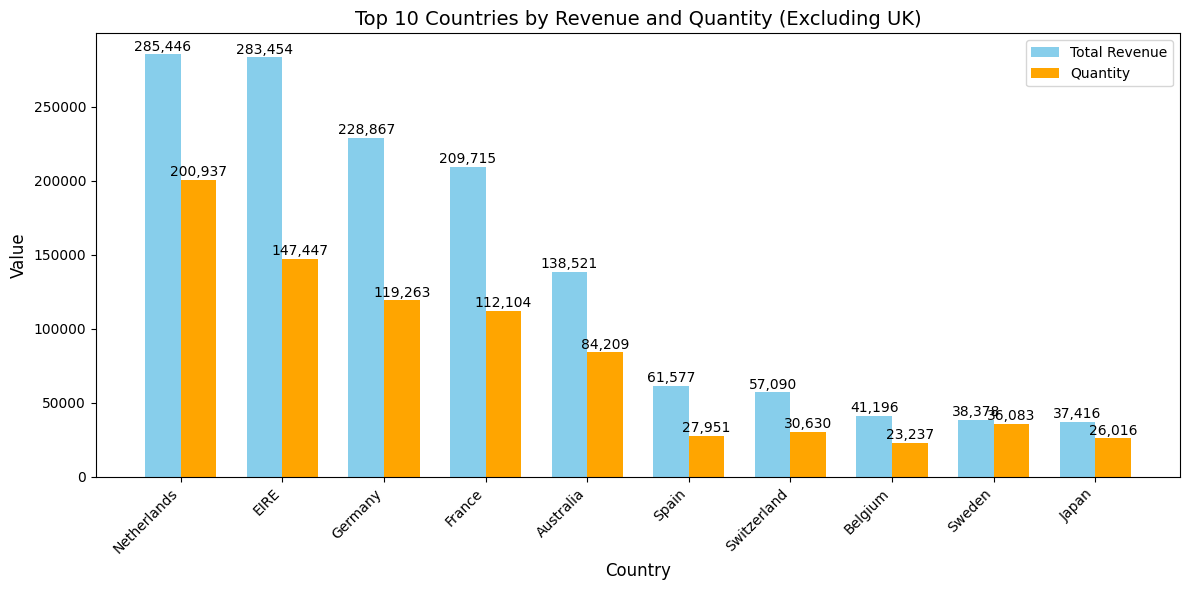

In [15]:
# Group by country, sum revenue and quantity
country_summary = df.groupby('Country')[['TotalAmount', 'Quantity']].sum().reset_index() # Changed tuple to list
# Sort by revenue in descending order and get the top 10
top_10_countries = country_summary.sort_values('TotalAmount', ascending=False).head(10)

top_10_countries.head(10)


# Plotting
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Set positions for the bars
r1 = range(len(top_countries['Country']))
r2 = [x + bar_width for x in r1]

# Create the bar plot for TotalAmount
plt.bar(r1, top_countries['TotalAmount'], color='skyblue', width=bar_width, label='Total Revenue')

# Create the bar plot for Quantity
plt.bar(r2, top_countries['Quantity'], color='orange', width=bar_width, label='Quantity')

# Add labels, title, and ticks
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 10 Countries by Revenue and Quantity (Excluding UK)', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(top_countries['Country']))], top_countries['Country'], rotation=45, ha='right')
plt.legend()

# Add data labels on top of the bars
for i, v in enumerate(top_countries['TotalAmount']):
    plt.text(i, v + 500, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

for i, v in enumerate(top_countries['Quantity']):
    plt.text(i + bar_width, v + 500, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)


# Show the plot
plt.tight_layout()
plt.show()

In [16]:
# prompt: # Q3: View the information on the top 10 customers by revenue; horizontal bar chart

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it contains a 'CustomerID' and 'TotalAmount' column.
top_10_customers = df.groupby('CustomerID')['TotalAmount'].sum().nlargest(10).reset_index()
top_10_customers.info()
# Convert 'CustomerID' to integer type to remove decimals
top_10_customers['CustomerID'] = top_10_customers['CustomerID'].astype(int)

# Convert 'CustomerID' to string type
top_10_customers['CustomerID'] = top_10_customers['CustomerID'].astype(str)

# Display the updated DataFrame information
top_10_customers.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   10 non-null     float64
 1   TotalAmount  10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   10 non-null     object 
 1   TotalAmount  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


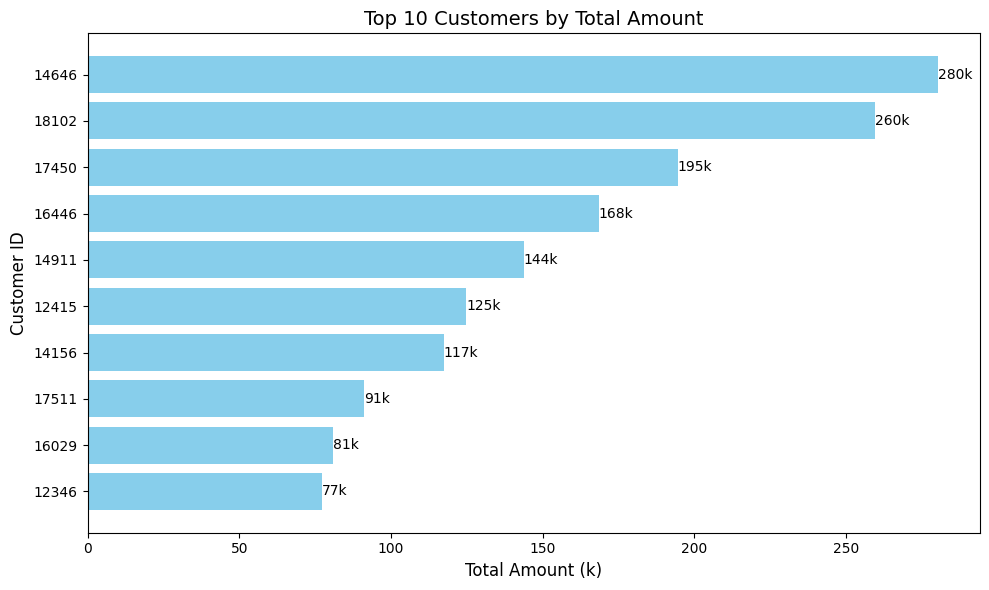

In [17]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_customers['CustomerID'], top_10_customers['TotalAmount'] / 1000, color='skyblue')  # Divide by 1000 for 'k' representation
plt.xlabel('Total Amount (k)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Top 10 Customers by Total Amount', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show highest value at the top

# Add data labels to the bars
for i, v in enumerate(top_10_customers['TotalAmount']):
    plt.text(v / 1000, i, f"{v/1000:.00f}k", color='black', va='center')  # Format labels as 'k'

plt.tight_layout()
plt.show()


In [32]:
#  Map Chart for:  Sum of quantity by country

import plotly.express as px

fig = px.choropleth(country_summary, locations="Country", locationmode='country names',
                    color="Quantity", hover_name="Country",
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Sum of Quantity by Country")
fig.show()


In [35]:
# Data visualization for Quantity excepts the United Kingdom
import plotly.express as px

# Filter out the United Kingdom
country_summary_filtered = country_summary[country_summary['Country'] != 'United Kingdom']

fig = px.choropleth(country_summary_filtered, locations="Country", locationmode='country names',
                    color="Quantity", hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Product Quantity by Country (Excluding UK)")
fig.show()


In [34]:
# using circle bubble map to view  Quantity excepts the United Kingdom

import plotly.express as px
# Filter out the United Kingdom
country_summary_filtered = country_summary[country_summary['Country'] != 'United Kingdom']

fig = px.scatter_geo(country_summary_filtered, locations="Country", locationmode='country names',
                     color="Quantity", size="Quantity", hover_name="Country",
                     projection="natural earth",
                     title="Quantity by Country (Excluding UK) - Bubble Map")
fig.show()